In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [ ]:
# Import data
df = pd.read_csv("carclaims.csv")
print(f"Data shape: {df.shape}")

Data shape: (15420, 33)


#Data Preprocessing

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


First we check to see if there are any missing values in our data.

In [ ]:
df.isnull().sum().any()

False

We then check for any duplicate rows

In [ ]:
sum(df.duplicated())

0

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


We can set the Policy Number as our index

In [ ]:
df.set_index('PolicyNumber')

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
PolicyNumber,,,,,,,,,,,,,,,,,,,,,
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15416,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15417,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15418,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes


We also want to look at the categorical data

In [ ]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days:Policy-Accident    object
Days:Policy-Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange-Claim     object
NumberOfCars            object
Year                     int64
BasePolicy              object
FraudFou

In [ ]:
df.describe(include = 'object')

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy,FraudFound
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,8,9,2,2,2,4,5,5,3,2
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision,No
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5807,5593,14992,15333,15179,7047,14324,14316,5962,14497


We see that there is erroneous data collection within the Months Claimed column. As such, we remove all rows with '0' in the column.

In [ ]:
df['MonthClaimed'].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct', '0'], dtype=object)

In [ ]:
df = df[df.MonthClaimed != '0']

Change objects to categories to better indicate to python libraries that these variables should be treated as categorical.

In [ ]:
categorical_variables = ['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'BasePolicy', 'FraudFound']

for col in categorical_variables:
    df[col] = df[col].astype('category')

<ipython-input-14-5ccd591b056e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-14-5ccd591b056e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-14-5ccd591b056e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [ ]:
df.dtypes

Month                     object
WeekOfMonth                int64
DayOfWeek                 object
Make                    category
AccidentArea            category
DayOfWeekClaimed          object
MonthClaimed              object
WeekOfMonthClaimed         int64
Sex                     category
MaritalStatus           category
Age                        int64
Fault                   category
PolicyType              category
VehicleCategory         category
VehiclePrice            category
PolicyNumber               int64
RepNumber                  int64
Deductible                 int64
DriverRating               int64
Days:Policy-Accident    category
Days:Policy-Claim       category
PastNumberOfClaims      category
AgeOfVehicle            category
AgeOfPolicyHolder       category
PoliceReportFiled       category
WitnessPresent          category
AgentType               category
NumberOfSuppliments     category
AddressChange-Claim     category
NumberOfCars            category
Year      

We see that there are two distinct groups of variates for dates. The first group does not end with 'Claimed' and represents when the accident/event occured.

We can reverse engineer these variates to create a new variate that represents the length in between the two dates, in days.

In [ ]:
Month_Start = pd.to_datetime(df['Year'].astype(str) + df['Month'] + '01', format="%Y%b%d")
DateOffset = (df['WeekOfMonth'] - 1) * 7 + df['DayOfWeek'].map(lambda x: time.strptime(x, '%A').tm_wday) - Month_Start.dt.dayofweek
Date = Month_Start + pd.to_timedelta(DateOffset, unit='D')

Month_StartClaimed = pd.to_datetime(df['Year'].astype(str) + df['MonthClaimed'] + '01', format="%Y%b%d")
DateOffsetClaimed = (df['WeekOfMonthClaimed'] - 1) * 7 + df['DayOfWeekClaimed'].map(lambda x: time.strptime(x, '%A').tm_wday) - Month_StartClaimed.dt.dayofweek
DateClaimed = Month_StartClaimed + pd.to_timedelta(DateOffsetClaimed, unit='D')


In [ ]:
df['Days:Accident-Claim'] = (DateClaimed - Date).dt.days
df['Days:Accident-Claim'][df['Days:Accident-Claim']<0] += 365

<ipython-input-17-05f47dfa35f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Days:Accident-Claim'][df['Days:Accident-Claim']<0] += 365


# Exploratory Data Analysis


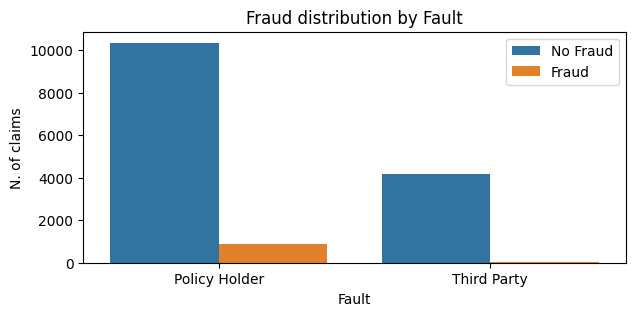

In [ ]:
plt.figure(figsize=(7, 3))
labels = ['No Fraud', 'Fraud']
sns.countplot(x= "Fault",hue="FraudFound" ,data=df)
plt.legend(labels)
plt.title('Fraud distribution by Fault')

plt.ylabel('N. of claims')
plt.show()

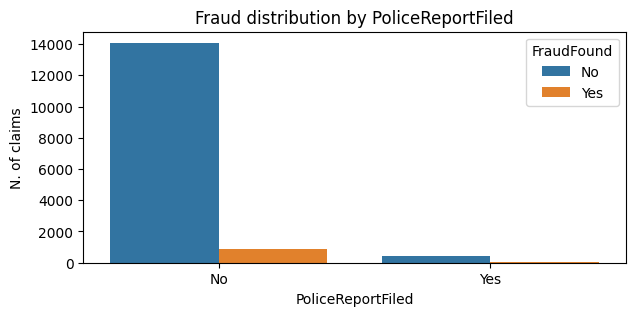

In [ ]:
plt.figure(figsize=(7, 3))
sns.countplot(x= "PoliceReportFiled",hue="FraudFound" ,data=df)
plt.title('Fraud distribution by PoliceReportFiled')

plt.ylabel('N. of claims')
plt.show()

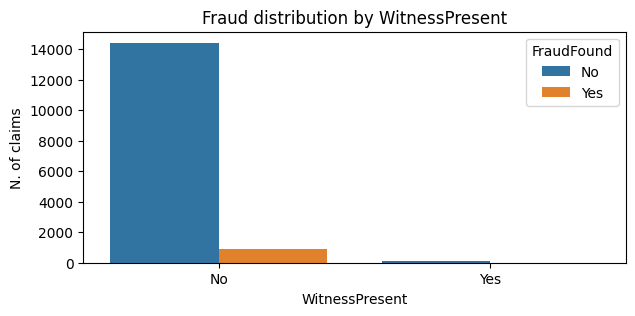

In [ ]:
plt.figure(figsize=(7, 3))
sns.countplot(x= "WitnessPresent",hue="FraudFound" ,data=df)
plt.title('Fraud distribution by WitnessPresent')

plt.ylabel('N. of claims')
plt.show()

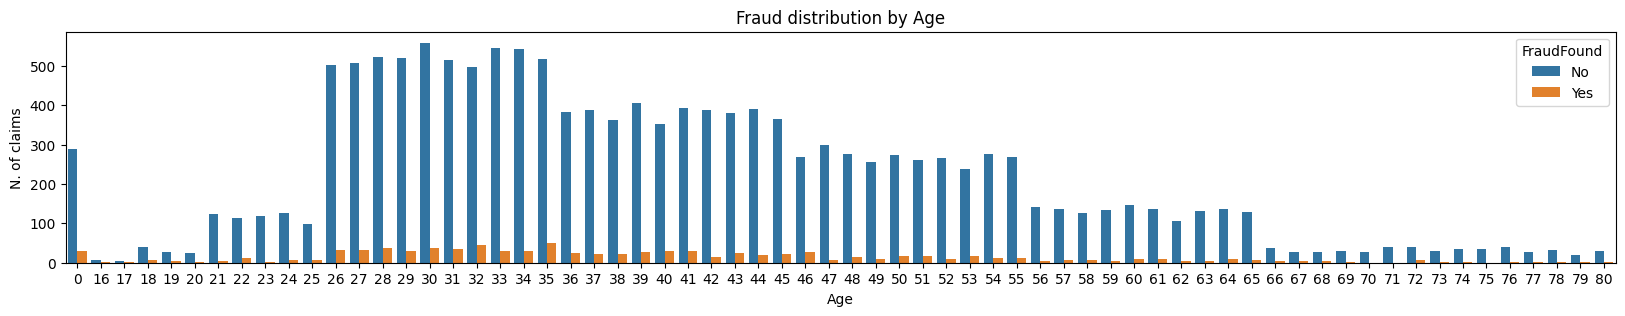

In [ ]:
plt.figure(figsize=(20, 3))
sns.countplot(x= "Age",hue="FraudFound" ,data=df)
plt.title('Fraud distribution by Age')

plt.ylabel('N. of claims')
plt.show()

We see that we have an age of '0' for age, this is likely the result of incorrect data collection.

In [ ]:
df = df[df.Age != '0']

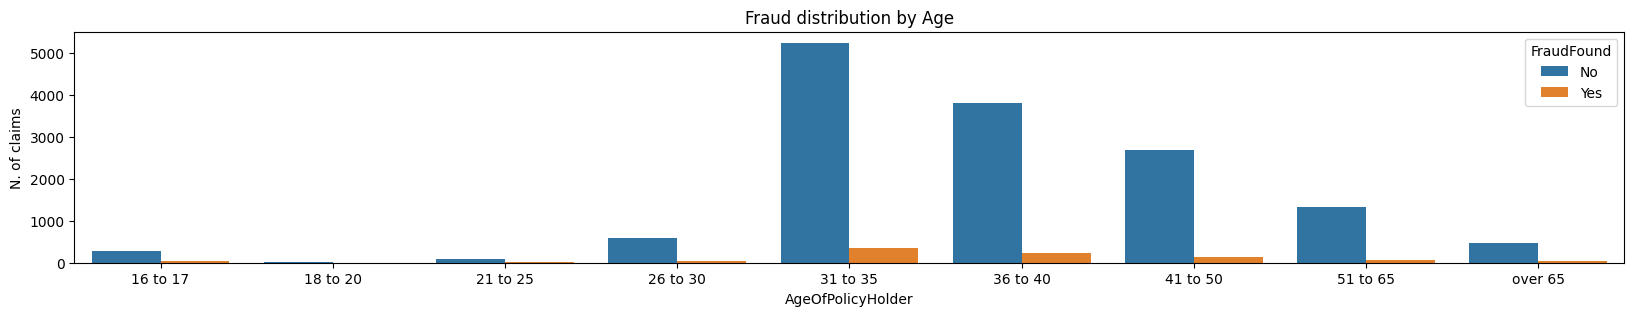

In [ ]:
plt.figure(figsize=(20, 3))
sns.countplot(x= "AgeOfPolicyHolder",hue="FraudFound" ,data=df)
plt.title('Fraud distribution by Age')

plt.ylabel('N. of claims')
plt.show()

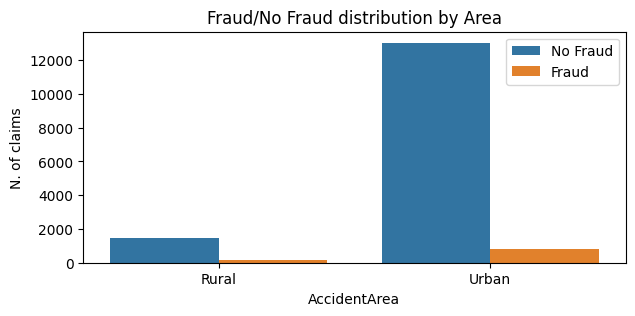

In [ ]:
df_fraud = df.loc[df['FraudFound']== 'Yes']
df_no_fraud = df.loc[df['FraudFound']== 'No']
plt.figure(figsize=(7,3))
labels = ['No Fraud', 'Fraud']
sns.countplot(x= "AccidentArea", hue ='FraudFound', data=df)


plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Area')

plt.ylabel('N. of claims')
plt.show()

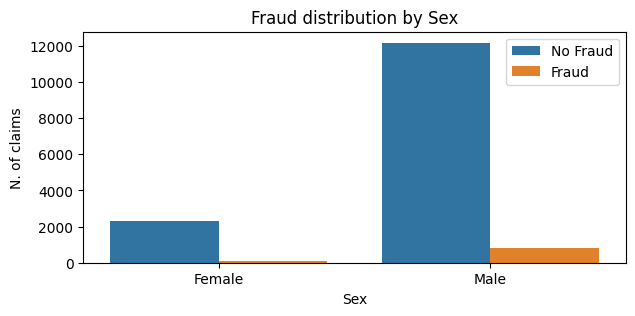

In [ ]:
plt.figure(figsize=(7, 3))
labels = ['No Fraud', 'Fraud']
sns.countplot(x= "Sex",hue="FraudFound" ,data=df)
plt.legend(labels)
plt.title('Fraud distribution by Sex')

plt.ylabel('N. of claims')
plt.show()

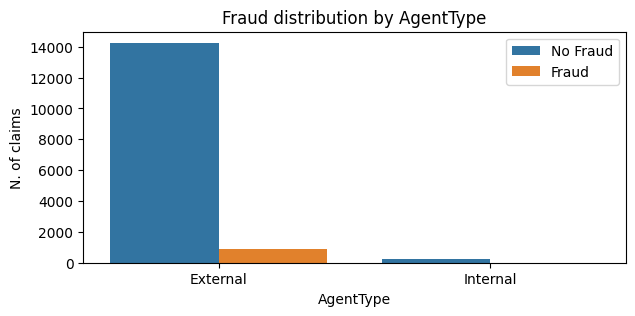

In [ ]:
plt.figure(figsize=(7, 3))
labels = ['No Fraud', 'Fraud']
sns.countplot(x= "AgentType",hue="FraudFound" ,data=df)
plt.legend(labels)
plt.title('Fraud distribution by AgentType')

plt.ylabel('N. of claims')
plt.show()

<ipython-input-27-f69894cc16e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-27-f69894cc16e6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), annot=True)


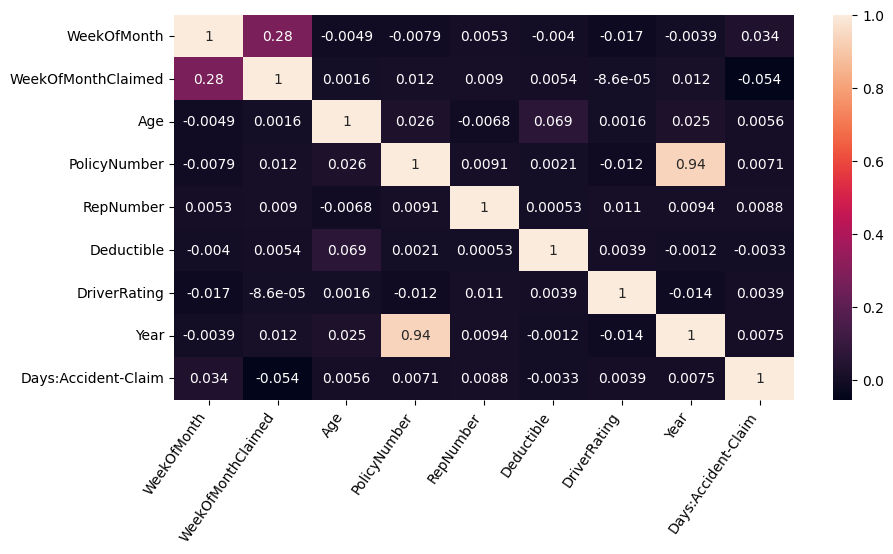

In [ ]:
df.corr()
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation = 55, horizontalalignment='right')
plt.show()

# Feature Selection

In [ ]:
df = df.drop(['Year', 'RepNumber', 'Make', 'VehicleCategory', 'Days:Policy-Accident', 'Days:Policy-Claim', 'Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed'], axis=1)

## Rebalancing Data - Look at this later


Next, we look at how many fraudulent claims are in the dataset

In [ ]:
df.FraudFound.value_counts()

No     14496
Yes      923
Name: FraudFound, dtype: int64

We see that around 6% of the claims are fraduluent. As such, we have an imbalance in the data.

There are several methods we can use to rebalance - Will explore this later.

In [ ]:
df.head()

,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehiclePrice,PolicyNumber,Deductible,DriverRating,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy,FraudFound,Days:Accident-Claim
0,Urban,Female,Single,21,Policy Holder,Sport - Liability,"more than 69,000",1,300,1,...,26 to 30,No,No,External,none,1 year,3 to 4,Liability,No,0
1,Urban,Male,Single,34,Policy Holder,Sport - Collision,"more than 69,000",2,400,4,...,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision,No,5
2,Urban,Male,Married,47,Policy Holder,Sport - Collision,"more than 69,000",3,400,3,...,41 to 50,No,No,External,none,no change,1 vehicle,Collision,No,13
3,Rural,Male,Married,65,Third Party,Sedan - Liability,"20,000 to 29,000",4,400,2,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability,No,20
4,Urban,Female,Single,27,Third Party,Sport - Collision,"more than 69,000",5,400,1,...,31 to 35,No,No,External,none,no change,1 vehicle,Collision,No,15


In [ ]:
# Clean up data
df['PoliceReportFiled'] = [1 if val == 'Yes' else 0 for val in df['PoliceReportFiled']]
df['WitnessPresent'] = [1 if val == "Yes" else 0 for val in df["WitnessPresent"]]
df['FraudFound'] = [1 if val == "Yes" else 0 for val in df["FraudFound"]]
df['AgeOfVehicle'] = df['AgeOfVehicle'].replace("new",0)
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].replace("none",0)
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].replace("none",0)
df['AddressChange-Claim'] = df['AddressChange-Claim'].replace("no change",0)

In [ ]:
# Changing columns with numeric value into numerical data
# pattern = r'(\d+)'
# columns = ['NumberOfCars','NumberOfSuppliments','AgeOfPolicyHolder','AgeOfVehicle','PastNumberOfClaims','VehiclePrice']
# for column in columns:
#   df[column] = df[column].astype(str)
#   df[column] = df[column].str.extract(pattern, expand=False)
#   df[column] = df[column].astype("int64")

In [ ]:
dummy_df = pd.get_dummies(df).astype("int64")

x = dummy_df.drop(['FraudFound'],axis=1)
y = dummy_df.filter(['FraudFound'],axis=1)

dummy_df.head()

,Age,PolicyNumber,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,FraudFound,Days:Accident-Claim,AccidentArea_Rural,AccidentArea_Urban,...,AddressChange-Claim_0,AddressChange-Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,21,1,300,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,34,2,400,4,1,0,0,5,0,1,...,1,0,1,0,0,0,0,0,1,0
2,47,3,400,3,0,0,0,13,0,1,...,1,0,1,0,0,0,0,0,1,0
3,65,4,400,2,1,0,0,20,1,0,...,1,0,1,0,0,0,0,0,0,1
4,27,5,400,1,0,0,0,15,0,1,...,1,0,1,0,0,0,0,0,1,0


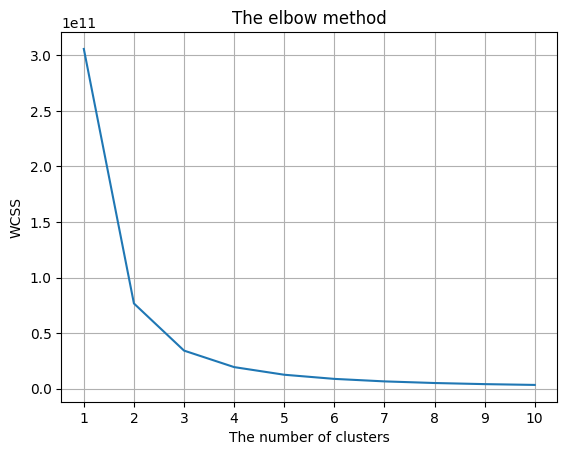

In [ ]:
# K-means check best clustering algorithm
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    k = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    k.fit(dummy_df)
    wcss.append(k.inertia_)

plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("The number of clusters")
plt.ylabel("WCSS")
plt.grid()
plt.xticks(range(1,11))
plt.show()

The above graph shows that the optimal number of clusters is 2 for our K-means graph.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster counts for K-Means:
Cluster 1: 7712 articles
Cluster 2: 7707 articles


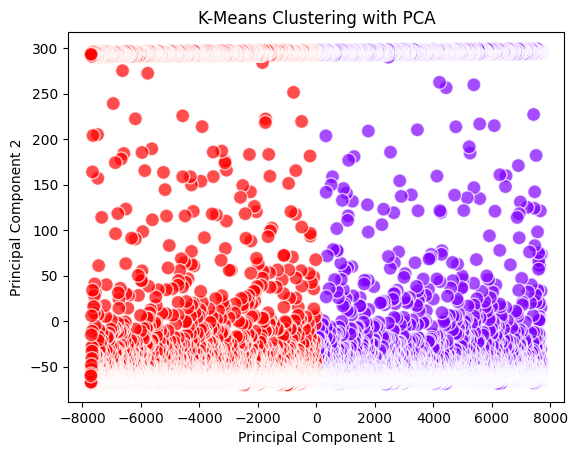

In [ ]:
#Clustering with pre-processed data
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

num_clusters = 2

#KMeans
kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
kmeans.fit(dummy_df)
kmeans_clusters = kmeans.labels_

unique_clusters, cluster_counts = np.unique(kmeans_clusters, return_counts = True)
print("Cluster counts for K-Means:")
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster + 1}: {count} articles")

# 2. Illustrate the clusters derived from K-Means using PCA for dimensionality reduction
pca = PCA(n_components = 2)
reduced_features = pca.fit_transform(np.array(dummy_df))

plt.scatter(reduced_features[:,0], reduced_features[:,1], c = kmeans_clusters, cmap='rainbow', alpha=0.7, edgecolors='w', s=100)
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
fraud_count = [0] * num_clusters
for i in range(len(kmeans_clusters)):
  try:
    if df['FraudFound'][i] == 1:
        fraud_count[kmeans_clusters[i]] += 1
  except Exception as e:
    # For some reason record number 1516 is balnk
    pass
print(fraud_count)

[505, 417]


As you can see from above, K-Means clustering is roughly distributing the fraud cases among the clusters evenly, so their is no real distinction that can be made.

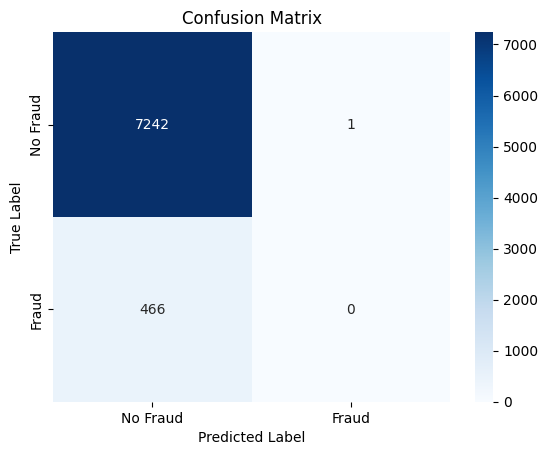

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7243
           1       0.00      0.00      0.00       466

    accuracy                           0.94      7709
   macro avg       0.47      0.50      0.48      7709
weighted avg       0.88      0.94      0.91      7709



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, accuracy_score

# Logistic regression with no oversampling

old_x = np.array(x)
old_y = np.array(y)

kfold = KFold(n_splits=2, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=10000)

for train_i, test_i in kfold.split(old_x):
  x_train, x_test = old_x[train_i], old_x[test_i]
  y_train, y_test = old_y[train_i], old_y[test_i]

  y_train = y_train.ravel()
  trained = model.fit(x_train, y_train)
  yhat = trained.predict(x_test)

conf_matrix = confusion_matrix(y_test, yhat)
classification_rep = classification_report(y_test, yhat)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f"Classification Report:\n{classification_rep}")

As you can see from the above result, the model is unable to predict any fraud cases due to the unbalanced nature of the dataset.

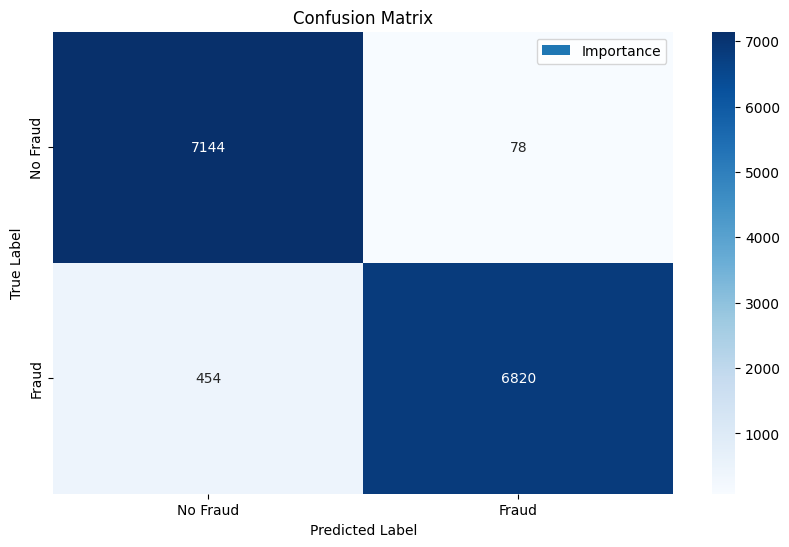

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7222
           1       0.99      0.94      0.96      7274

    accuracy                           0.96     14496
   macro avg       0.96      0.96      0.96     14496
weighted avg       0.96      0.96      0.96     14496



In [ ]:
# Logistic regression using oversampling
import pandas as pd

smote = SMOTE()
x_res, y_res = smote.fit_resample(x,y)

oversampled = x_res
oversampled["Target"] = y_res

X = oversampled.drop(["Target"], axis = 1)
new_x = np.array(oversampled.drop(["Target"],axis=1))
new_y = np.array(oversampled.filter(["Target"],axis=1))

kfold = KFold(n_splits=2, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=10000)

for train_i, test_i in kfold.split(new_x):
  x_train, x_test = new_x[train_i], new_x[test_i]
  y_train, y_test = new_y[train_i], new_y[test_i]

  y_train = y_train.ravel()
  trained = model.fit(x_train, y_train)
  yhat = trained.predict(x_test)

coefficients = model.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

conf_matrix = confusion_matrix(y_test, yhat)
classification_rep = classification_report(y_test, yhat)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f"Classification Report:\n{classification_rep}")

By oversampling, we can remove some of the imbalance of the dataset which helps the model predict fraud cases as shown above.

Accuracy: 0.8913748378728924



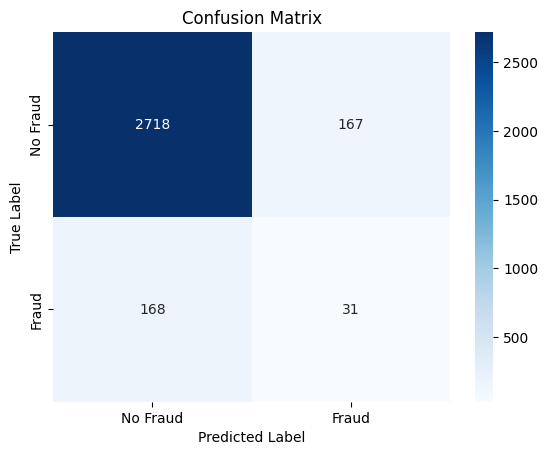

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2885
           1       0.16      0.16      0.16       199

    accuracy                           0.89      3084
   macro avg       0.55      0.55      0.55      3084
weighted avg       0.89      0.89      0.89      3084

Oversampling
Accuracy: 0.8942931258106356



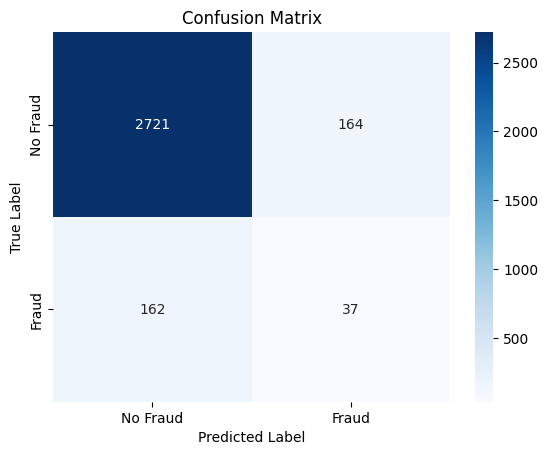

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2885
           1       0.18      0.19      0.19       199

    accuracy                           0.89      3084
   macro avg       0.56      0.56      0.56      3084
weighted avg       0.89      0.89      0.89      3084



In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

#non-oversampled trees
y = dummy_df["FraudFound"]
x = dummy_df.drop("FraudFound", axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

cls = tree.DecisionTreeClassifier(random_state = 42)

cls.fit(x_train, y_train)

yhat = cls.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)
classification_rep = classification_report(y_test, yhat)

print(f"Accuracy: {accuracy}\n")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f"Classification Report:\n{classification_rep}")

#Oversampled Tree
print("Oversampling")
oversample = SMOTE(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x_train, y_train)
cls2 = tree.DecisionTreeClassifier(random_state = 42)

cls2.fit(x_over, y_over)

yhat = cls2.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)
classification_rep = classification_report(y_test, yhat)

print(f"Accuracy: {accuracy}\n")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9241245136186771



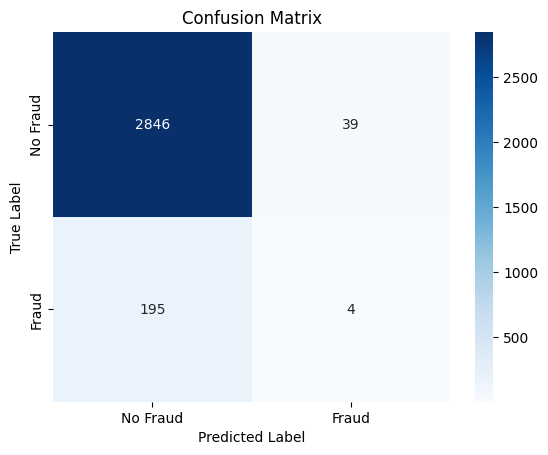

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2885
           1       0.09      0.02      0.03       199

    accuracy                           0.92      3084
   macro avg       0.51      0.50      0.50      3084
weighted avg       0.88      0.92      0.90      3084

Oversampling
Accuracy: 0.7798313878080415



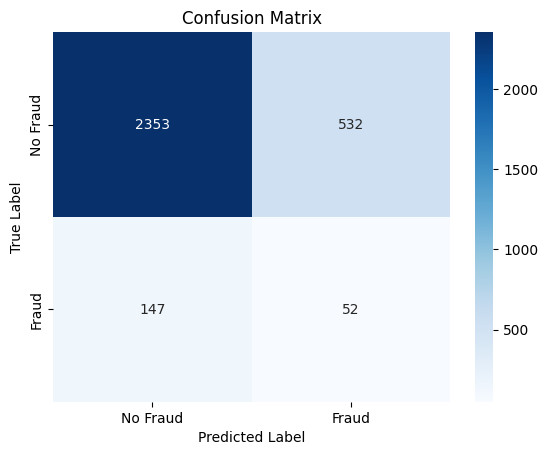

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      2885
           1       0.09      0.26      0.13       199

    accuracy                           0.78      3084
   macro avg       0.52      0.54      0.50      3084
weighted avg       0.89      0.78      0.83      3084



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

y = dummy_df["FraudFound"]
x = dummy_df.drop("FraudFound", axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

cls = KNeighborsClassifier(n_neighbors=3)

cls.fit(x_train, y_train)

yhat = cls.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)
classification_rep = classification_report(y_test, yhat)

print(f"Accuracy: {accuracy}\n")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f"Classification Report:\n{classification_rep}")

print("Oversampling")
oversample = SMOTE(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x_train, y_train)
cls2 = KNeighborsClassifier(n_neighbors=3)

cls2.fit(x_over, y_over)

yhat = cls2.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)
classification_rep = classification_report(y_test, yhat)

print(f"Accuracy: {accuracy}\n")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f"Classification Report:\n{classification_rep}")

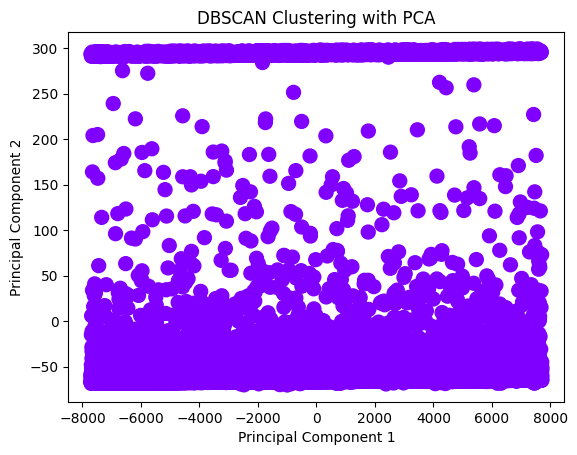

In [ ]:
#DBSCAN - INCONCLUSIVE RESULTS
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=3)
myLabels = dbscan.fit_predict(dummy_df)
pca = PCA(n_components = 3)
reduced_features2 = pca.fit_transform(np.array(dummy_df))
plt.scatter(reduced_features2[:,0], reduced_features2[:,1], c = myLabels, cmap='rainbow', s=100)
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()